In [24]:
# Import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
# Read the data from CSV file
data = pd.read_csv('diabetic_data.csv')

In [26]:
# Shape of the data
rows, columns = data.shape
print(f'Rows : {rows}, Columns : {columns}')

Rows : 101766, Columns : 50


In [27]:
# Delete the column encounter_id
if 'encounter_id' in data.columns:
	data = data.drop('encounter_id', axis=1) # axis=1 for column
	print('Column encounter_id column deleted.')
else:
    print('encounter_id column not found.')

Column encounter_id column deleted.


In [28]:
# Identify the missing values
missing_values = data.isnull().sum()
print(missing_values)

patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [29]:
# Identify the missing values with ? notation
missing_values = (data == '?').sum()
missing_values

patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [30]:
# Replacing the ? with NaN
data = data.replace('?', np.nan)

In [31]:
# Identify the missing values with NaN after replacing ?
missing_values_after_replacment = data.isnull().sum()
missing_values_after_replacment

patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [32]:
# Replacing readmitted values to binary
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].astype(str).replace(['>30','NO'], 0)

In [33]:
# Data types of the columns
data_types = data.dtypes
print(data_types)

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

In [34]:
# Drop columns with more than 90% missing values
# TODO: List out columns to be dropped
data = data.dropna(thresh=0.9*len(data), axis=1)

In [35]:
# Dropping columns with near zero variance
columns_to_drop = ['repaglinide',
                   'nateglinide',
                   'chlorpropamide',
                   'glimepiride',
                   'acetohexamide',
                   'tolbutamide',
                   'acarbose',
                   'miglitol',
                   'troglitazone',
                   'tolazamide',
                   'examide',
                   'citoglipton',
                   'glyburide-metformin',
                   'glipizide-metformin',
                   'glimepiride-pioglitazone',
                   'metformin-rosiglitazone',
                   'metformin-pioglitazone']
# TODO: show how zero variance is calculated
for col in columns_to_drop:
	if col in data.columns:
		data = data.drop(col, axis=1)

In [36]:
# Drop rows with null values
data = data.dropna()

In [37]:
# Summary statistics
summary_statistics = data.describe().T
print(summary_statistics)

                            count          mean           std    min  \
patient_nbr               98053.0  5.484792e+07  3.866175e+07  135.0   
admission_type_id         98053.0  2.025813e+00  1.450117e+00    1.0   
discharge_disposition_id  98053.0  3.753368e+00  5.309392e+00    1.0   
admission_source_id       98053.0  5.776692e+00  4.071640e+00    1.0   
time_in_hospital          98053.0  4.421976e+00  2.993074e+00    1.0   
num_lab_procedures        98053.0  4.314807e+01  1.971203e+01    1.0   
num_procedures            98053.0  1.350749e+00  1.708506e+00    0.0   
num_medications           98053.0  1.611965e+01  8.108476e+00    1.0   
number_outpatient         98053.0  3.763781e-01  1.283359e+00    0.0   
number_emergency          98053.0  2.024619e-01  9.428923e-01    0.0   
number_inpatient          98053.0  6.468645e-01  1.271020e+00    0.0   
number_diagnoses          98053.0  7.512060e+00  1.832497e+00    3.0   

                                 25%         50%         75%   

In [38]:
# Removing outliers based on IQR method for each numerical column
for col in data.select_dtypes(include=np.number).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Only keep rows in the dataframe that do not fall below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]


In [39]:
# # Perform feature normalization for numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [40]:
# Show the shape of resulting dataframe
rows, columns = data.shape
print(f'Rows : {rows}, Columns : {columns}')

Rows : 53632, Columns : 27


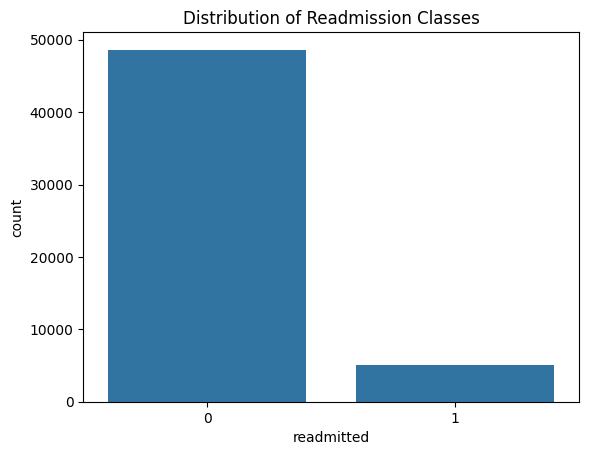

In [41]:
# Distribution of readmitted variable
sns.countplot(x='readmitted', data=data)
plt.title('Distribution of Readmission Classes')
plt.show()

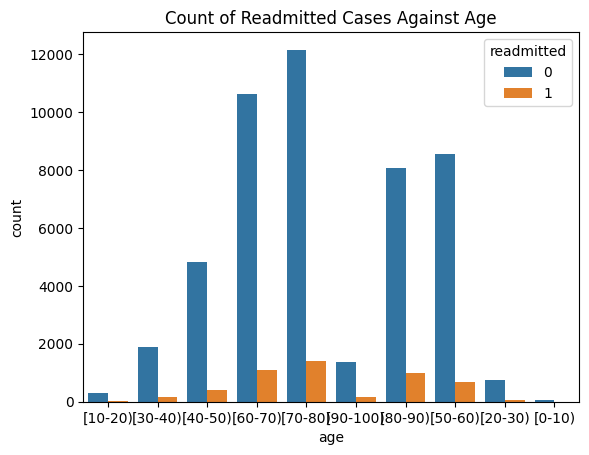

In [42]:
# Graph showing the count of readmitted against age.
sns.countplot(x='age', hue='readmitted', data=data)
plt.title('Count of Readmitted Cases Against Age')
plt.show()

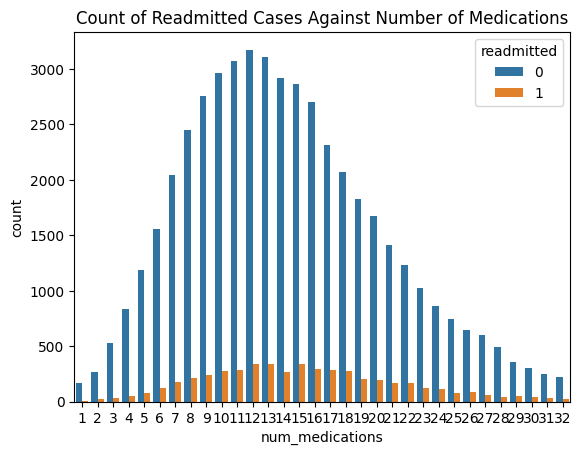

In [43]:
# Graph showing the count of readmitted vs the number of medications.
sns.countplot(x='num_medications', hue='readmitted', data=data)
plt.title('Count of Readmitted Cases Against Number of Medications')
plt.show()

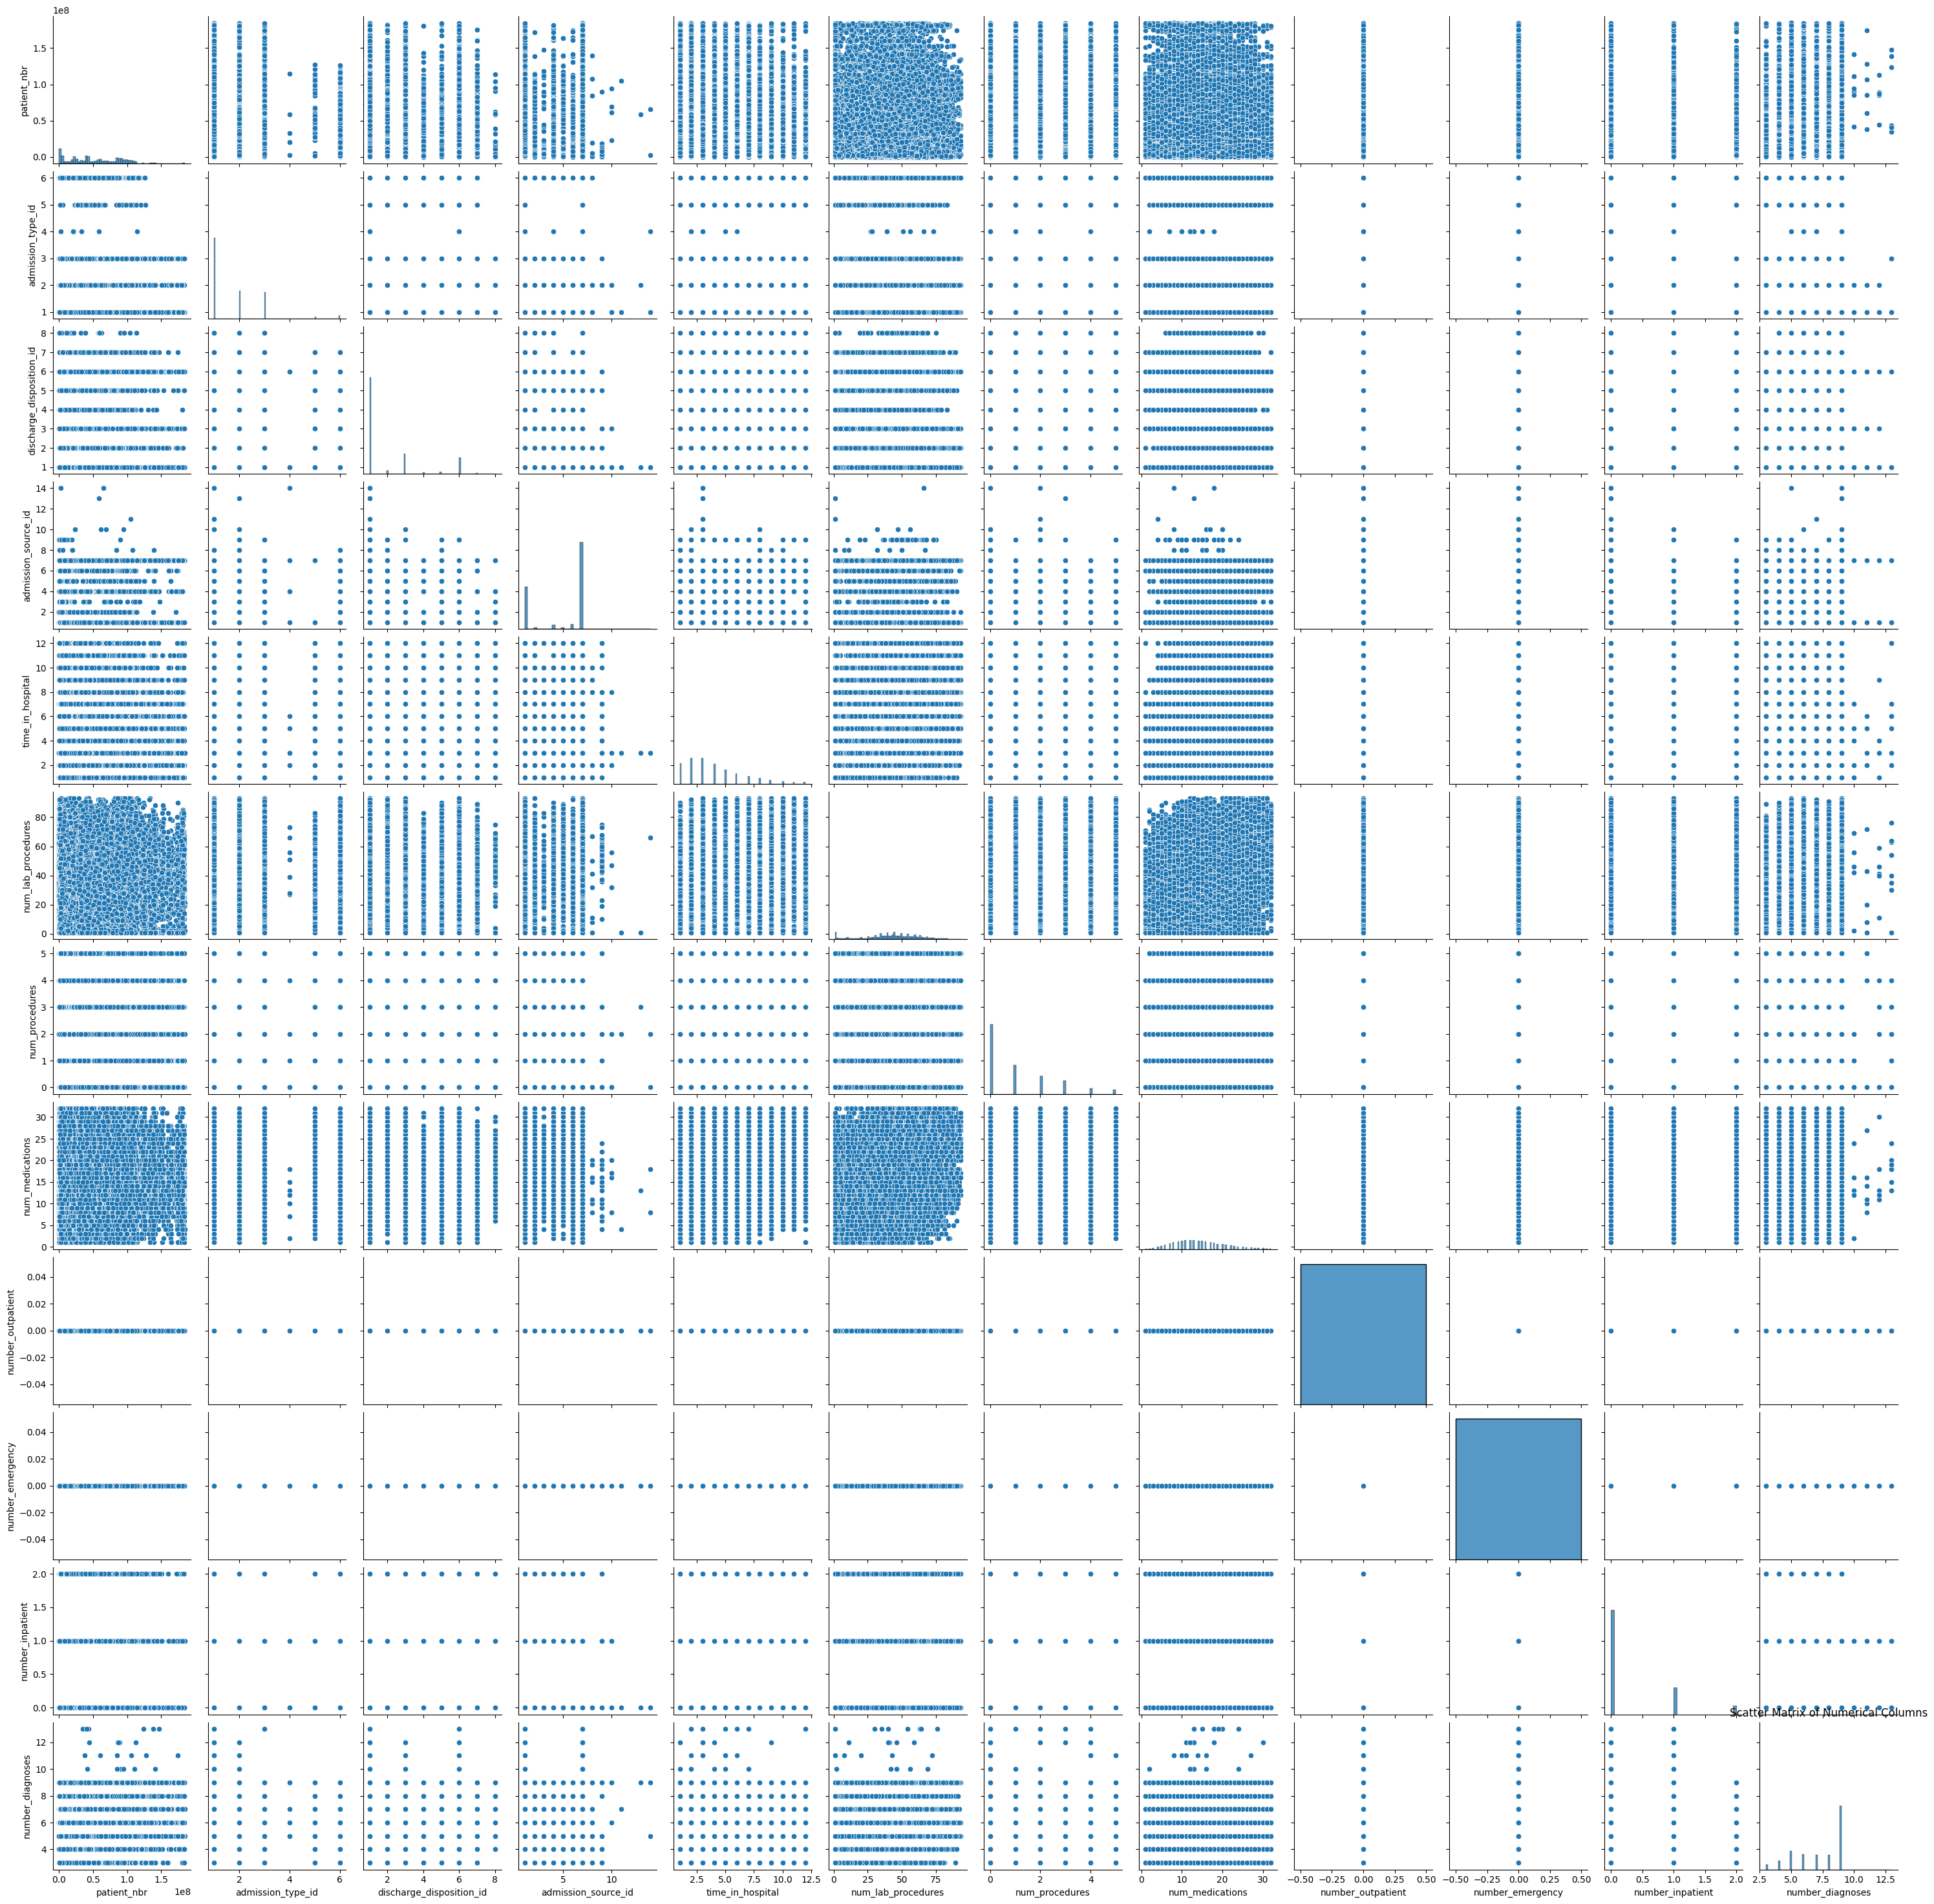

In [44]:
# Scatter matrix of numerical columns
sns.pairplot(data[numerical_columns])
plt.title('Scatter Matrix of Numerical Columns')
plt.show()

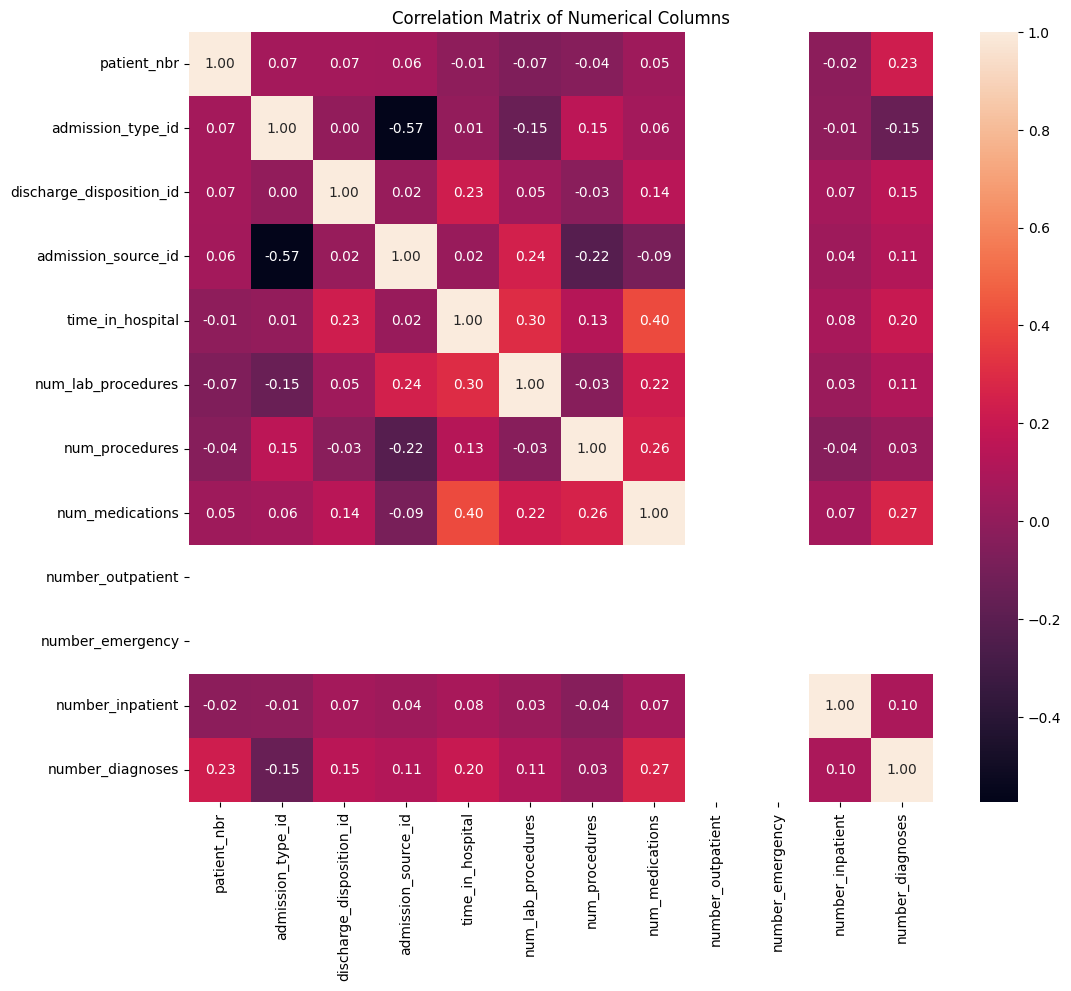

In [48]:
# Correlation matrix of numerical columns
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [49]:
# Highly correlated columns
highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
	for j in range(i):
		if abs(correlation_matrix.iloc[i, j]) > 0.95:
			colname = correlation_matrix.columns[i]
			highly_correlated_columns.add(colname)
if not highly_correlated_columns:
	print('No highly correlated columns found.')
else:
	print(f'Highly correlated columns : {highly_correlated_columns}')

No highly correlated columns found.
